Nuclear Power Data Analysis

Author: Miles Paca, mpaca3@gmail.com

This notebook process and displays power generation data from 3 separate sources focused mainly on Nuclear Power in the US.  Specific analyses include nuclear reactor capacity by type, total US Nuclear Power output and US Natural Gas consuption with ARIMA forecast.

By analyzing these specific domains of the US Nuclear Power industry, the hope is to obtain a better understanding of trends to enable informed decision making for industry and government.

Data Sources: 

https://www.nrc.gov/reading-rm/doc-collections/datasets/index.html "Commercial Nuclear Power Reactors – Operating Reactors" dataset

https://www.eia.gov/electricity/data/state/annual_generation_state.xls "Net Generation by State by Type of Producer by Energy Source (EIA-906, EIA-920, and EIA-923)

https://www.eia.gov/electricity/data/state/annual_consumption_state.xls "Fossil Fuel Consumption for Electricity Generation by Year, Industry Type and State (EIA-906, EIA-920, and EIA-923)2"

Tutorials Used or Referenced:

builtin.com: "A Guide to Time Series Forecasting in Python" by Sadrach Pierre: https://builtin.com/data-science/time-series-forecasting-python

Digitalocean.com:  "A Guide to Time Series Forecasting with ARIMA in Python 3" by Thomas Vincent: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [1]:
#Import Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import io
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from flask import Flask
import numpy as np

In [2]:
#Create paths for Saving files.  Note- users should adjust for their specific file path
graphs_path = "C:/Users/mpaca/OneDrive/Desktop/Data Analytics/Projects/Nuclear Power Data Analysis/graphs/"


#Read in Operating Reactors datasheet, sourced from https://www.nrc.gov/reading-rm/doc-collections/datasets/index.html
reactors_operating_filepath = "data/reactors-operating.xlsx"

#Filepath for Annual Generation dataset, sourced from https://www.eia.gov/electricity/data/state/annual_generation_state.xls.
#  Note: file changed to a .csv and modified in order to address ingestion issues.
annual_generation_stat_filepath = "data/annual_generation_state.csv"

#Filepath for Annual Consumption dataset, sourced from https://www.eia.gov/electricity/data/state/annual_consumption_state.xls.
#  Note: file changed to a .csv and modified in order to address ingestion issues.
annual_consumption_filepath = "data/annual_consumption_state.csv"

df = pd.read_excel(reactors_operating_filepath)

df.describe()

,Year of Update,NRC Region,Licensed MWt,Capacity MWe,Current Reactor Age,License Length,Time Remaining,% License Remaining,Year Operating License Issued,2021 Capacity Factor (Percent),...,2009 Capacity Factor (Percent),2008 Capacity Factor (Percent),2005 Capacity Factor (Percent),2004 Capacity Factor (Percent),2003 Capacity Factor (Percent),Column1,Column2,Column3,Column4,Column5
count,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,0.0,...,91.000000,91.000000,90.000000,90.000000,89.000000,0.0,0.0,0.0,0.0,0.0
mean,2022.0,2.397849,3193.410753,1030.849462,41.204301,59.247312,17.460863,0.293333,1980.795699,NaN,...,0.908901,0.921209,0.903667,0.908222,0.885056,NaN,NaN,NaN,NaN,NaN
std,0.0,1.033565,613.386491,203.224974,8.523062,8.107506,7.696414,0.138591,8.523062,NaN,...,0.127492,0.075466,0.069564,0.085309,0.131401,NaN,NaN,NaN,NaN,NaN
min,2022.0,1.000000,1677.000000,519.000000,0.000000,40.000000,1.841096,0.046027,1969.000000,NaN,...,0.030000,0.640000,0.630000,0.650000,-0.010000,NaN,NaN,NaN,NaN,NaN
25%,2022.0,2.000000,2804.000000,877.000000,36.000000,60.000000,11.556164,0.193151,1974.000000,NaN,...,0.870000,0.870000,0.870000,0.860000,0.830000,NaN,NaN,NaN,NaN,NaN
50%,2022.0,2.000000,3411.000000,1120.000000,41.000000,60.000000,17.726027,0.304338,1981.000000,NaN,...,0.930000,0.930000,0.910000,0.920000,0.910000,NaN,NaN,NaN,NaN,NaN
75%,2022.0,3.000000,3625.600000,1168.000000,48.000000,60.000000,22.917808,0.373881,1986.000000,NaN,...,0.985000,0.980000,0.940000,0.987500,0.960000,NaN,NaN,NaN,NaN,NaN
max,2022.0,4.000000,4408.000000,1401.000000,53.000000,80.000000,39.616438,0.990411,2022.000000,NaN,...,1.130000,1.090000,1.020000,1.030000,1.040000,NaN,NaN,NaN,NaN,NaN


Power Output of Nuclear Reactors  

This analysis aims to caputre the power output of Nuclear Reactors based on Capacity Factor.  Capacity factor refers to the operating capacity, i.e. what capacity the reactor is operating at.  Additionally, I aim to analyze the fraction of total nuclear power that each reactor type produces.  By examining this, we can determine which Nuclear reactors are most efficient.  Since this data also contains information on the NRC region, we can also look at specific power production by region.

Average prodution capacity for BWR-MARK 1: 89.24


C:\Users\mpaca\AppData\Local\Temp\ipykernel_25152\1810499374.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_avg_capacity = df_avg_capacity.append(row)
C:\Users\mpaca\AppData\Local\Temp\ipykernel_25152\1810499374.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_avg_capacity = df_avg_capacity.append(row)
C:\Users\mpaca\AppData\Local\Temp\ipykernel_25152\1810499374.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_avg_capacity = df_avg_capacity.append(row)
C:\Users\mpaca\AppData\Local\Temp\ipykernel_25152\1810499374.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_avg_capacity = df_avg_capacity.append(row)
C:\U

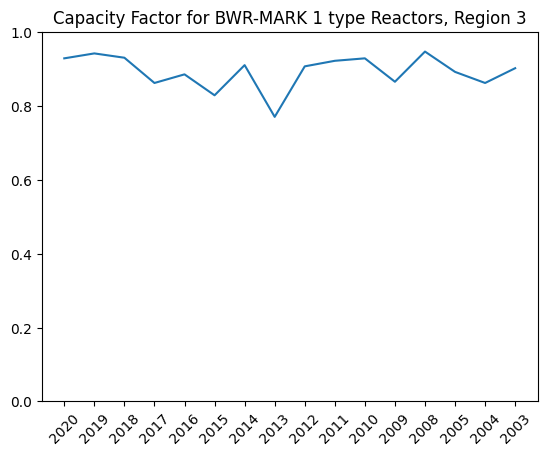

In [3]:
#Show Capacity Factor Trends for 2003-2020

substring = "Capactiy Factor"

#Select a Reactor Type and NRC Region, adjust as necessary
selected_reactor_type = "BWR-MARK 1"
selected_nrc_region = 3

df_avg_capacity = pd.DataFrame()

#Extract relevant Capacity Data
for index, row in df.iterrows():
    if(row["Reactor and Containment Type"] == selected_reactor_type and row["NRC Region"] == selected_nrc_region):
        df_avg_capacity = df_avg_capacity.append(row)  
    

#Average the extracted data
avg_df = pd.DataFrame()

for (columnName, columnData) in df_avg_capacity.iteritems():
    if "Capacity Factor" in columnName:
        avg_df.at[0, columnName[:4]] = columnData.mean()

transposed_df = avg_df.transpose()
avg_prod_cap = round(transposed_df[0].mean() * 100, 2)
print("Average prodution capacity for " + selected_reactor_type + ": " + avg_prod_cap.__str__())

plt.plot(transposed_df)

#Plot Data & save a copy
plt.xticks(rotation = 45)
plt.ylim(top=1, bottom=0)
title = "Capacity Factor for " + selected_reactor_type + " type Reactors, Region " + str(selected_nrc_region)
capacityFactor_save_title = graphs_path + "CapacityFactor" + selected_reactor_type + "Reg_" + str(selected_nrc_region) + ".png"
plt.title(title)
plt.savefig(capacityFactor_save_title)
plt.show()

In [4]:
##Show Percentage of total MW Produced by Reactor Type

#Dictonary of reactor types with list [total MWe generated, count, avg per reactor, avg per type]
reactor_dictionary = {"PWR-DRYAMB" : [0,0,0,0], 
                      "BWR-MARK 1": [0,0,0,0], 
                      "BWR-MARK 2": [0,0,0,0],
                      "BWR-MARK 3": [0,0,0,0],
                      " PWR - Freestanding steel vessel with shield building": [0,0,0,0],
                      "PWR-DRYSUB": [0,0,0,0],
                      "PWR-ICECND": [0,0,0,0]}

#Sum capacities for all reactors by type
for index, row in df.iterrows():
    key = row["Reactor and Containment Type"]
    if key in reactor_dictionary:
        reactor_dictionary[key][0] += row["Capacity MWe"]
        reactor_dictionary[key][1] += 1
    
#Determine the average MWe per reactor of a specific type        
total_mwe = 0
for key, value in reactor_dictionary.items():
    if(value[1] > 0):
        value[2] = value[0] / value [1]
    else:
        print("No reactors of type " + key + "were found.")
    
    total_mwe += value[0] #Add total MWe output for the specific reactor type to the total for all reactors
    
#Determine the average MWe per type and the average MWe per reactor of each type
avg_mwe_per_type = []
avg_mwe_per_type_per_reactor = []
for key, value in reactor_dictionary.items():
    value[3] = value[0] / total_mwe
    avg_mwe_per_type.append(value[3])
    avg_mwe_per_type_per_reactor.append(value[2])
    



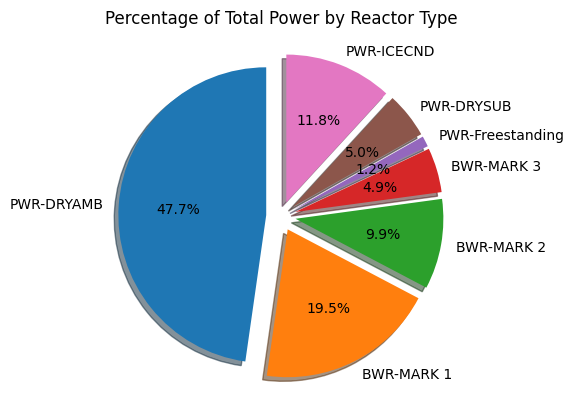

In [5]:
#Display and save a chart showing total Reactor Power output
label = list(reactor_dictionary.keys())
label[4] = "PWR-Freestanding" #Shorten name for labels
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

ax.pie(avg_mwe_per_type, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
reactorPie_save_title = graphs_path + "ReactorPie.png"
plt.title("Percentage of Total Power by Reactor Type")
plt.savefig(reactorPie_save_title)

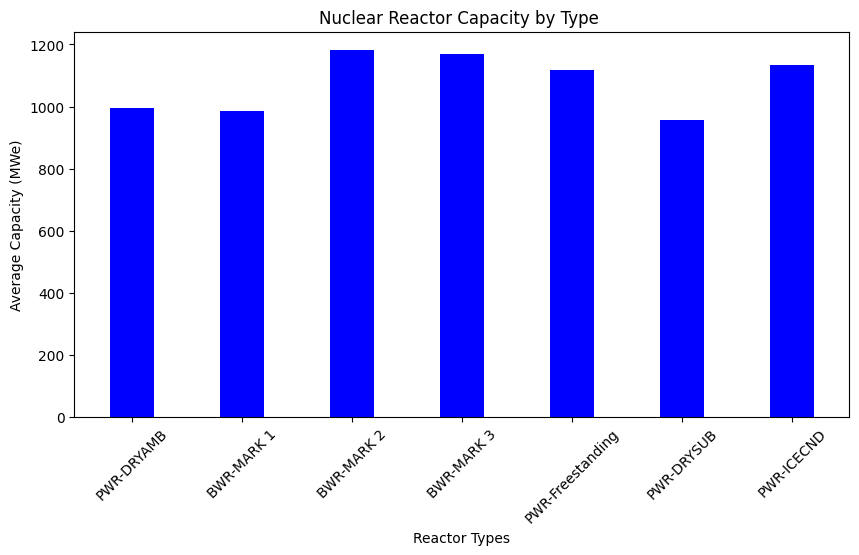

In [6]:
fig = plt.figure(figsize = (10, 5))
 
# Display and save a bar plot of Nuclear Reactor Capacity by Type
plt.bar(label, avg_mwe_per_type_per_reactor, color ='blue',
        width = 0.4)
 
plt.xlabel("Reactor Types")
plt.ylabel("Average Capacity (MWe)")
plt.title("Nuclear Reactor Capacity by Type ")
plt.xticks(rotation = 45)

#capByType_path = "C:/Users/mpaca/OneDrive/Desktop/Data Analytics/Projects/Nuclear Power Data Analysis/graphs/"
capByType_save_title = graphs_path + "ReactorCapByType.png"
plt.savefig(capByType_save_title)

plt.show()

US Power Generation

This goal of this analysis is to study the total power generation and consumption in the US in terms of specific power industries.  By llookig at these trends, we can tell which energy types the US relies most heavily on and which resources will be most heavily consumed in the coming years.  Using analysis and predictions such as these can help us to adjust our dependency on fossil fuels to more renewable forms of energy

In [7]:
#Read in the Annual Generation by State Dataset, sourced from https://www.eia.gov/electricity/data/state/annual_generation_state.xls

ags_df = pd.read_csv(annual_generation_stat_filepath, thousands=",")

ags_df.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1990,AK,Total Electric Power Industry,Total,5599506,NaN,NaN,NaN,NaN,NaN,NaN
1,1990,AK,Total Electric Power Industry,Coal,510573,NaN,NaN,NaN,NaN,NaN,NaN
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521,NaN,NaN,NaN,NaN,NaN,NaN
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261,NaN,NaN,NaN,NaN,NaN,NaN
4,1990,AK,Total Electric Power Industry,Petroleum,497116,NaN,NaN,NaN,NaN,NaN,NaN


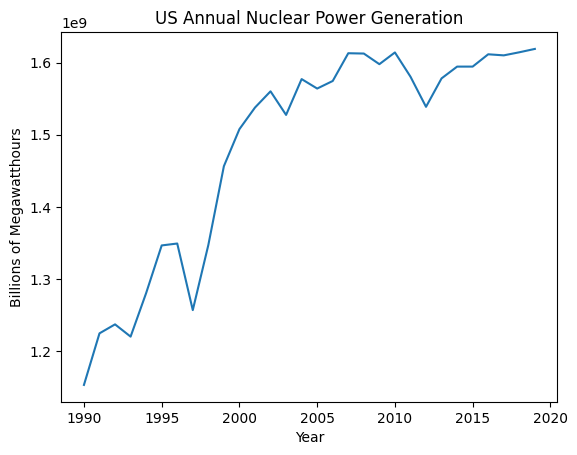

In [8]:
ags_nuc_df = pd.DataFrame()
ags_df.head()

industries = ["Nuclear", "Coal", "Hydroelectric Conventional", "Natural Gas", "Petroleum", "Wind", "Wood and Wood Derived Fuels", "Other Biomass"]

cond = {'a': "Nuclear", 'c': "Total Electric Power Industry"}
ags_df['GENERATION (Megawatthours)'] = pd.to_numeric(ags_df['GENERATION (Megawatthours)'])

nuclear_generation_by_year = {}
generations = []
years =[]

for year in range(1990, 2020):
    year_sum = ags_df.loc[(ags_df["ENERGY SOURCE"] == cond['a']) & (ags_df["YEAR"] == year) & (ags_df["TYPE OF PRODUCER"] == cond['c']), ['GENERATION (Megawatthours)']].sum()
    generations.append(year_sum[0])
    years.append(year)

nuclear_generation_by_year = {"YEARS" : years, "GENERATION (Megawatthours)" : generations}
nuc_gener_df = pd.DataFrame(nuclear_generation_by_year)

nuc_gener_df.head()

plt.ylabel("Billions of Megawatthours")
plt.xlabel("Year")
plt.title("US Annual Nuclear Power Generation")
plt.plot(nuc_gener_df["YEARS"], nuc_gener_df["GENERATION (Megawatthours)"])

capByType_save_title = graphs_path + "US_Annual_Nuclear_Power_Generation.png"
plt.savefig(capByType_save_title)


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = nuclear_generation_by_year.values()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


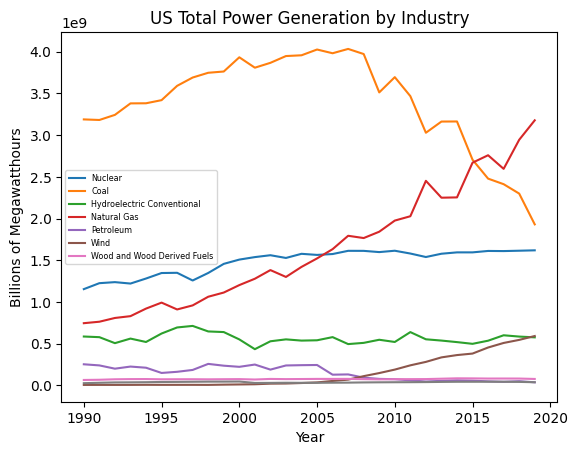

In [10]:
ags_nuc_df = pd.DataFrame()

#Loop through the various power industries and plot their total Power Generation
ags_df['GENERATION (Megawatthours)'] = pd.to_numeric(ags_df['GENERATION (Megawatthours)'])
industries = ["Nuclear", "Coal", "Hydroelectric Conventional", "Natural Gas", "Petroleum", "Wind", "Wood and Wood Derived Fuels", "Other Biomass"]
for industry in industries:
    cond = {'a': industry, 'c': "Total Electric Power Industry"} 


    generation_by_year = {}
    generations = []
    years =[]
    for year in range(1990, 2020):
        generation_by_year[year] = ags_df.loc[(ags_df["ENERGY SOURCE"] == cond['a']) & (ags_df["YEAR"] == year) & (ags_df["TYPE OF PRODUCER"] == cond['c']), ['GENERATION (Megawatthours)']].sum()

    plt.ylabel("Billions of Megawatthours")
    plt.xlabel("Year")
    plt.title("US Total Power Generation by Industry")
    #plt.legend()#bbox_to_anchor=(1.0, 1.0))
    plt.legend(prop={'size':5.8})#bbox_to_anchor =(0.5,-0.6), loc='lower center')
    #plt.tight_layout()
    plt.plot(generation_by_year.keys(), generation_by_year.values(), label=industry)

capByType_save_title = graphs_path + "US_Annual_Power_Generation_By_Industry.png"
plt.savefig(capByType_save_title)

In [11]:
#Read in the Annual Consumption by State Dataset, sourced from https://www.eia.gov/electricity/data/state/annual_consumption_state.xls 

acs_df = pd.read_csv(annual_consumption_filepath)
acs_df['CONSUMPTION'] = pd.to_numeric(acs_df['CONSUMPTION'], errors="coerce")

acs_df.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,CONSUMPTION
0,1990,AK,Total Electric Power Industry,Coal (Short Tons),404871.0
1,1990,AK,Total Electric Power Industry,Petroleum (Barrels),961837.0
2,1990,AK,Total Electric Power Industry,Natural Gas (Mcf),42764948.0
3,1990,AK,"Electric Generators, Electric Utilities",Coal (Short Tons),290182.0
4,1990,AK,"Electric Generators, Electric Utilities",Petroleum (Barrels),657706.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


404871.0


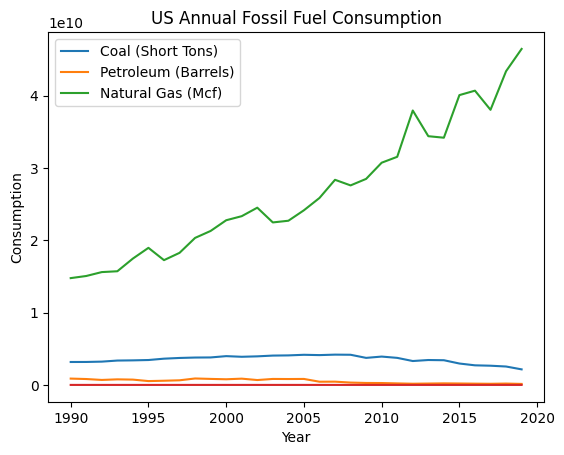

In [12]:

energy_sources = ["Coal (Short Tons)", "Petroleum (Barrels)", "Natural Gas (Mcf)", "Other Gases (Billion BTU)"]

print(acs_df['CONSUMPTION'][0])

for source in energy_sources:
    consumption_by_year = {}
    cond = {'a': source}
    for year in range(1990, 2020):
        consumption_by_year[year] = acs_df.loc[(acs_df["ENERGY SOURCE"] == cond['a']) & (acs_df["YEAR"] == year), ['CONSUMPTION']].sum()
        csum= acs_df.loc[(acs_df["ENERGY SOURCE"] == cond['a']) & (acs_df["YEAR"] == year), ['CONSUMPTION']].sum()

    plt.ylabel("Consumption")
    plt.xlabel("Year")
    plt.title("US Annual Fossil Fuel Consumption")
    plt.legend()#bbox_to_anchor=(1.0, 1.0))
    plt.plot(consumption_by_year.keys(), consumption_by_year.values(), label=source)

    capByType_save_title = graphs_path + "US_Annual_Fossil_Fuel_Consumption.png"
    plt.savefig(capByType_save_title)

In [13]:
nuclear_generation_by_year = {}
natural_gas_consumption = []
gyears =[]

for year in range(1990, 2020):
    gyear_sum = acs_df.loc[(acs_df["ENERGY SOURCE"] == "Natural Gas (Mcf)") & (acs_df["YEAR"] == year), ['CONSUMPTION']].sum()
    natural_gas_consumption.append(gyear_sum[0])
    gyears.append(year)

natural_gas_by_year = {"YEARS" : gyears, "CONSUMPTION" : natural_gas_consumption}
print(natural_gas_consumption)
natural_gas_df = pd.DataFrame(natural_gas_by_year)

natural_gas_df.head()

[14766250656.0, 15059113696.0, 15598872078.0, 15714610252.0, 17468593620.0, 18951483220.0, 17249832020.0, 18259078560.0, 20325536714.0, 21287937116.0, 22765922528.0, 23329221492.0, 24504249561.0, 22464541274.0, 22698318324.0, 24145478454.0, 25846459224.0, 28357369256.0, 27583371996.0, 28484275356.0, 30720738912.0, 31535473190.0, 37938839024.0, 34385193976.0, 34177546184.0, 40066302164.0, 40680438812.0, 38032249184.0, 43368514008.0, 46451430932.0]


,YEARS,CONSUMPTION
0,1990,1.476625e+10
1,1991,1.505911e+10
2,1992,1.559887e+10
3,1993,1.571461e+10
4,1994,1.746859e+10


Time Series Forecasting of Natural Gas Consumption

According to the chart shown above, the fossil fuel the US relies most heavily on for power production is Natural Gas.  With this in mind, it is useful to predict future dependencies on this resource not only to ensure adequate supply is available but also to look for viable alternatives (such as Nuclear power) to fill the production gap.

Using Autoregressive Moving Integrated Average (ARIMA), we can predict the future demand for Natural Gas based on previous years data.  

In [14]:
import datetime
import seaborn as sns
natural_gas_df.index = pd.to_datetime(natural_gas_df['YEARS'], format='%Y')
del natural_gas_df["YEARS"]
natural_gas_df.head()

,CONSUMPTION
YEARS,
1990-01-01,1.476625e+10
1991-01-01,1.505911e+10
1992-01-01,1.559887e+10
1993-01-01,1.571461e+10
1994-01-01,1.746859e+10


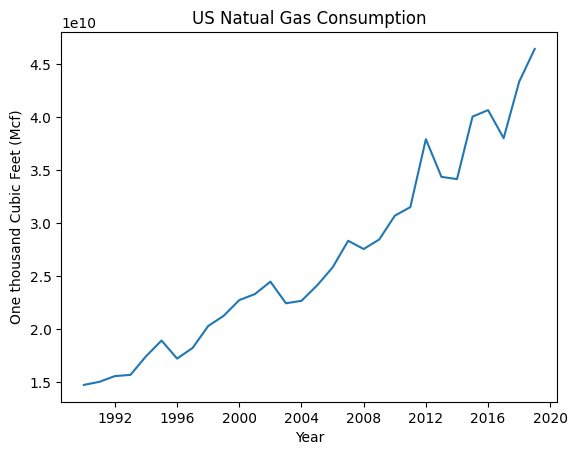

In [15]:
#First, plot Natural Gas consumption data for the past 30 years

plt.ylabel("One thousand Cubic Feet (Mcf)")
plt.xlabel("Year")
plt.title("US Natual Gas Consumption")
plt.plot(natural_gas_df.index, natural_gas_df["CONSUMPTION"])

capByType_save_title = graphs_path + "Natural_Gas_consumption.png"
plt.savefig(capByType_save_title)

Code in the following section was taken and modified from two tutorials and modified for the Nuclear Dataset used here.  
Link to builtin.com Forecasting "A Guide to Time Series Forecasting in Python" tutorial: https://builtin.com/data-science/time-series-forecasting-python
Link to Digitalocean.com "A Guide to Time Series Forecasting with ARIMA in Python 3" tutorial: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

c:\Users\mpaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\mpaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\mpaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\mpaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few obser

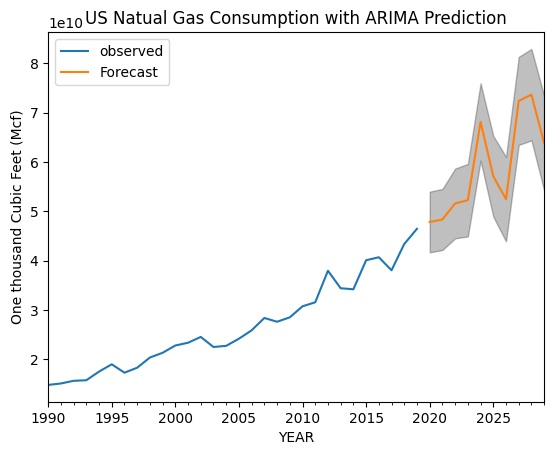

In [16]:

#Develop an ARIMA model to forecast Natural Gas consumption for furture years.
  
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

y= natural_gas_df["CONSUMPTION"]

mod = ARIMA(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

pred_uc = results.get_forecast(steps=10)

pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed')#, figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('YEAR')#, fontsize = 30)
ax.set_ylabel('One thousand Cubic Feet (Mcf)')#, fontsize = 30)
plt.title("US Natual Gas Consumption with ARIMA Prediction")#, fontsize =40)
plt.legend(loc='upper left')
#plt.figure().set_figheight(4)
#plt.figure().set_figwidth(4)
capByType_save_title = graphs_path + "Natural_gas_consuption_with_ARIMA.png"
plt.savefig(capByType_save_title)

plt.show()


Note that this graph shows the current consumption levels in blue and the predicted consumption for the next 10 years in orange.  The gray region captures an approximate confidence interval for the 10 year prediction.  Overall, this shows that US consumption and thereby demand of Natural Gas will increase.